<a href="https://colab.research.google.com/github/vivek1905/Animal_Conditions_Classification-/blob/main/Animal_Conditions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  DATA DISCOVERY

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data.csv')
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [ ]:
df.isna().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [ ]:
df.describe()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,871,871,871,871,871,871,869
unique,46,232,230,229,217,203,2
top,Buffaloes,Fever,Diarrhea,Coughing,Weight loss,Pains,Yes
freq,129,257,119,95,117,99,849


# DATA PREPARATION

In [ ]:
# Drop duplicates based on all columns
df = df.drop_duplicates()

In [ ]:
df[(df['Dangerous'] != 'Yes') & (df['Dangerous'] != 'No')]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [ ]:
# Remove null values for specific columns
df = df.dropna(subset=['Dangerous'])

In [ ]:
df.AnimalName.value_counts()

AnimalName
Buffaloes            128
Sheep                109
Pig                   63
Fowl                  62
Elephant              59
Duck                  56
Birds                 37
cat                   36
Dog                   34
Donkey                33
Monkey                28
Goat                  26
Deer                  26
Cattle                21
Hamster               18
Lion                  16
Rabbit                11
Horse                 10
Chicken                9
Fox                    7
Other Birds            6
Tiger                  6
horse                  5
Turtle                 4
chicken                4
cow                    3
Pigs                   3
donkey                 2
Goats                  2
White-tailed deer      1
Hyaenas                1
Wolves                 1
Dogs                   1
Fox                    1
Moos                   1
Reindeer               1
snake                  1
Black-tailed deer      1
Mule deer              1
Wapiti        

In [ ]:
for col in df.columns:
    print(f'Type of {col} column is {df[col].dtype}')

Type of AnimalName column is object
Type of symptoms1 column is object
Type of symptoms2 column is object
Type of symptoms3 column is object
Type of symptoms4 column is object
Type of symptoms5 column is object
Type of Dangerous column is object


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a copy of the original DataFrame
df1 = df.copy()
# Convert 'symptoms1' to 'symptoms5' to numerical format
le = LabelEncoder()
for col in ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'AnimalName', 'Dangerous']:
    df1[col] = le.fit_transform(df1[col])

In [ ]:
df1

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,6,63,30,179,181,32,1
1,6,63,30,31,164,113,1
2,6,63,30,31,172,8,1
3,6,63,33,31,87,142,1
4,6,63,30,31,87,21,1
...,...,...,...,...,...,...,...
866,2,63,33,115,53,160,1
867,2,63,94,88,87,78,1
868,2,97,89,179,107,82,1
869,2,77,25,179,27,159,1


# DATA VISUALIZATION

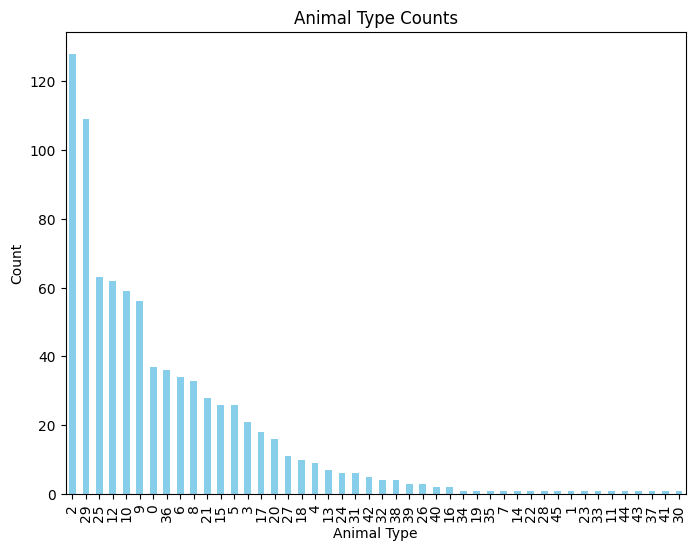

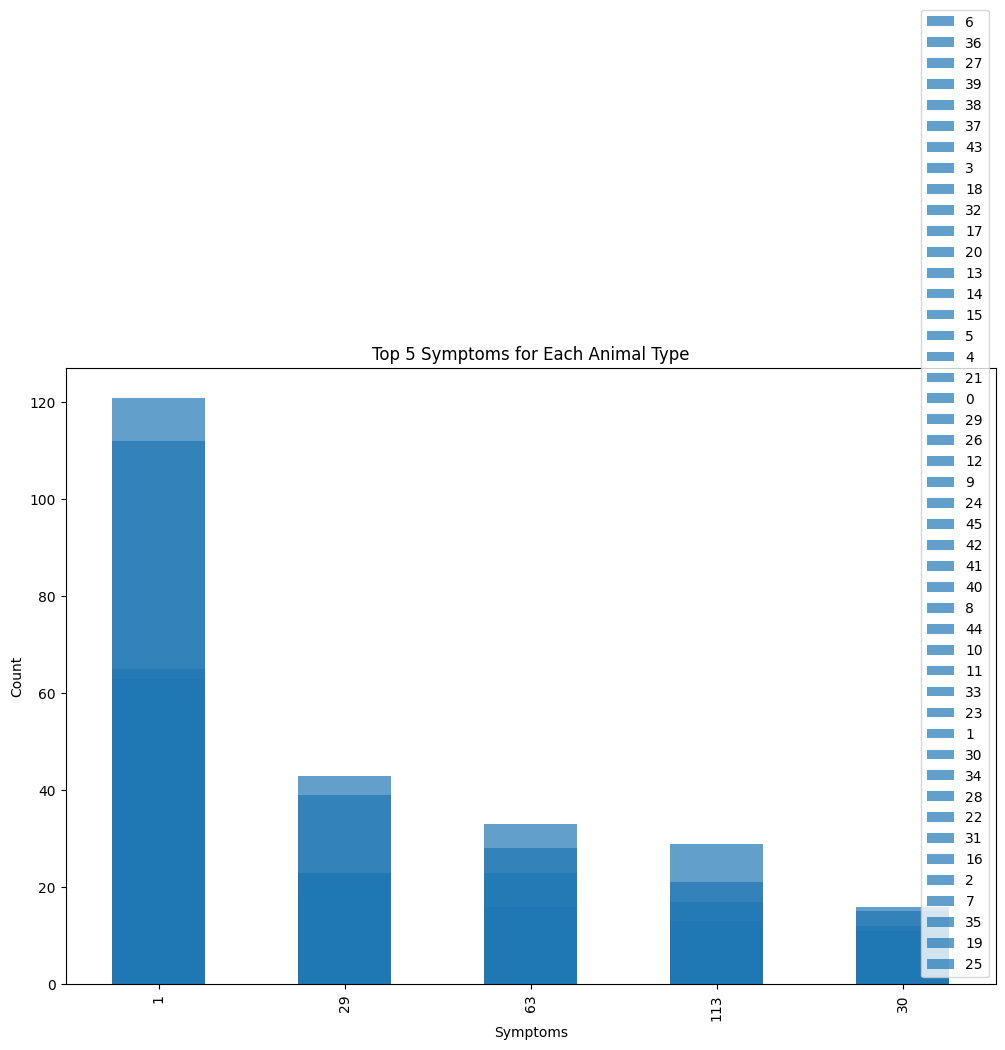

In [ ]:
# Count the occurrences of each animal type
animal_counts = df1['AnimalName'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
animal_counts.plot(kind='bar', color='skyblue')
plt.title('Animal Type Counts')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Plot the top 5 symptoms for each animal type
plt.figure(figsize=(12, 8))
for animal_type in df1['AnimalName'].unique():
    top5_symptoms = df1[df1['AnimalName'] == animal_type].iloc[:, 1:].stack().value_counts().head(5)
    top5_symptoms.plot(kind='bar', alpha=0.7, label=animal_type)

plt.title('Top 5 Symptoms for Each Animal Type')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.legend()
plt.show()

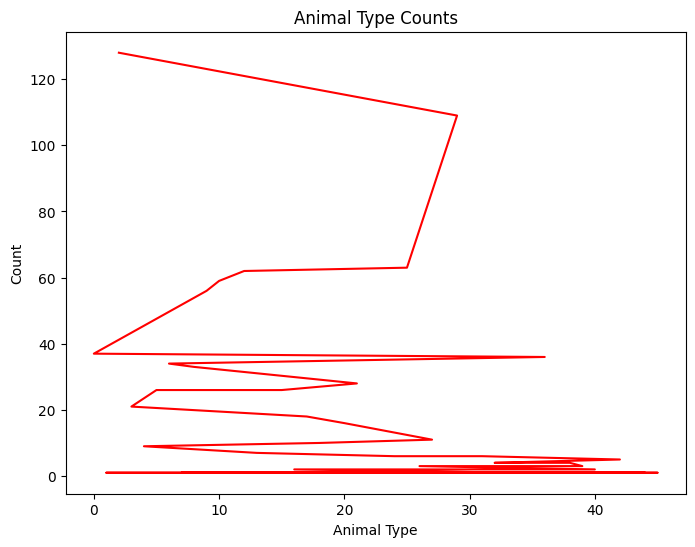

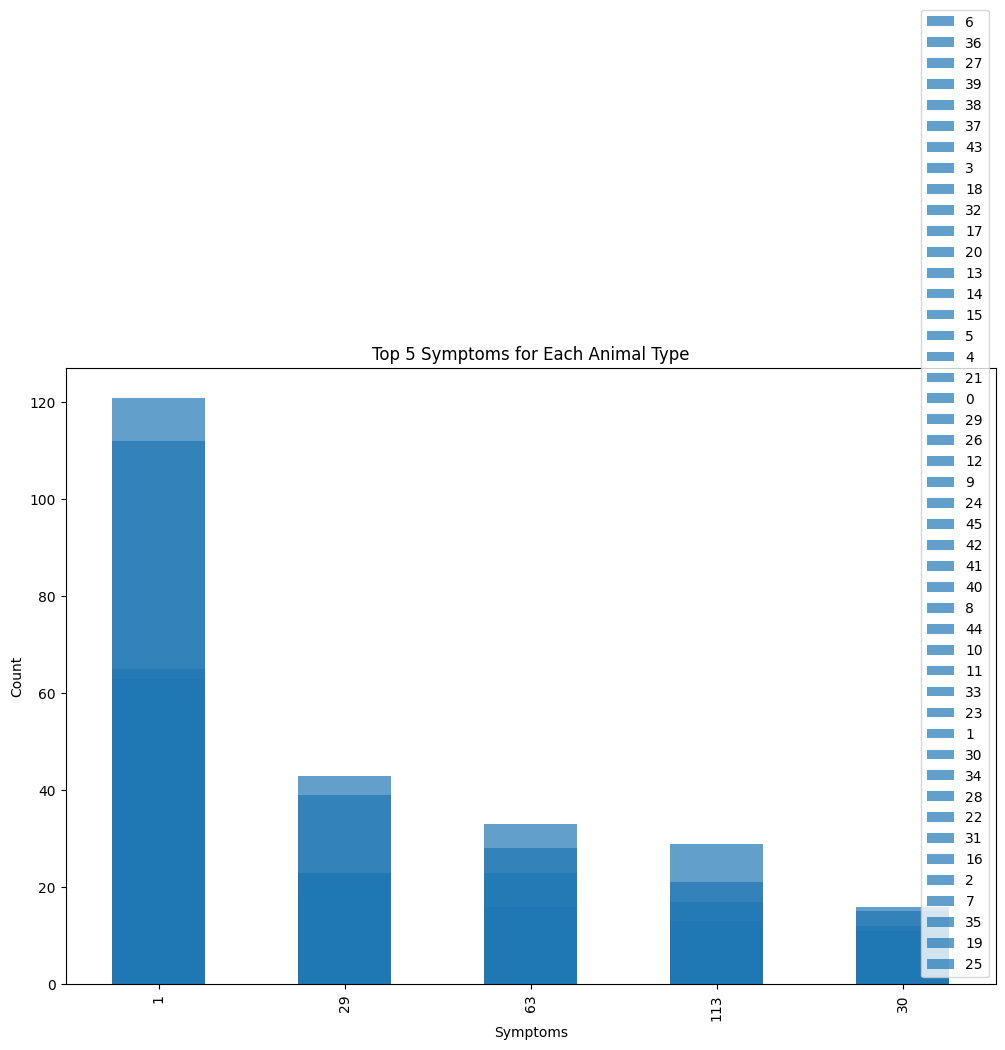

In [ ]:
# Count the occurrences of each animal type
animal_counts = df1['AnimalName'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
animal_counts.plot(kind='line', color='red')
plt.title('Animal Type Counts')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Plot the top 5 symptoms for each animal type
plt.figure(figsize=(12, 8))
for animal_type in df1['AnimalName'].unique():
    top5_symptoms = df1[df1['AnimalName'] == animal_type].iloc[:, 1:].stack().value_counts().head(5)
    top5_symptoms.plot(kind='bar', alpha=0.7, label=animal_type)

plt.title('Top 5 Symptoms for Each Animal Type')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.legend()
plt.show()

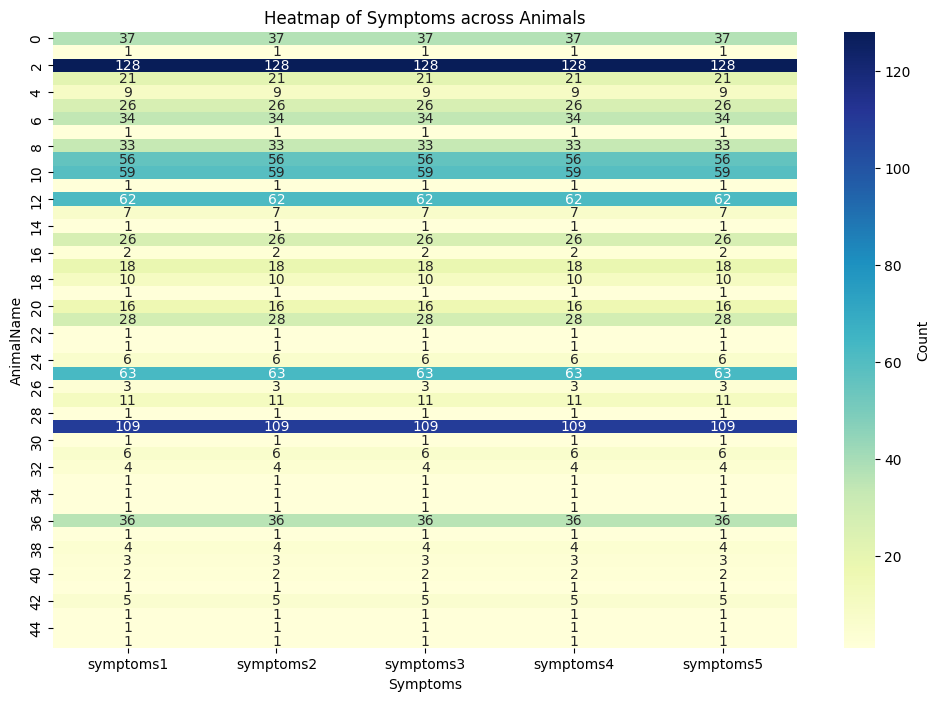

In [ ]:
# Assuming 'AnimalName' is the categorical variable and 'symptoms1' to 'symptoms5' are symptom columns
df1_melted = pd.melt(df1, id_vars='AnimalName', value_vars=['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5'])

# Create a pivot table to prepare data for the heatmap
heatmap_data = df1_melted.pivot_table(index='AnimalName', columns='variable', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.xlabel('Symptoms')
plt.ylabel('AnimalName')
plt.title('Heatmap of Symptoms across Animals')
plt.show()


# MODEL PLANNING AND MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
X = df1.drop(columns=['Dangerous'])
y = df1['Dangerous']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=90)

In [ ]:
from sklearn.preprocessing import StandardScaler
# SVM model with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Use Support Vector Machine

model_svm = SVC(kernel='linear',random_state=0)
model_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predictions on training set
y_train_pred = model_svm.predict(X_train_scaled)


In [ ]:
# Training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.98


In [ ]:
# Predictions on test set
y_test_pred = model_svm.predict(X_test_scaled)


In [ ]:
# Testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Testing Accuracy: 0.98


In [ ]:
# Evaluate SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.98      1.00      0.99       206

    accuracy                           0.98       211
   macro avg       0.49      0.50      0.49       211
weighted avg       0.95      0.98      0.96       211

Accuracy: 0.976303317535545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# COMMUNICATE RESULTS

In [ ]:
# Function to display selection menu
def display_menu(options):
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    choice = int(input("Enter your choice (number): ")) - 1
    return options[choice]

# Define the animal_to_encoded dictionary
animal_to_encoded = {
    'Dog': 8, 'Cat': 3, 'Rabbit': 31, 'Cow': 6, 'Chicken': 5, 'Cattle': 4, 'Mammal': 23, 'Horse': 20, 'Turtle': 37,
    'Hamster': 19, 'Lion': 22, 'Fox': 15, 'Fox ': 16, 'Goat': 17, 'Deer': 7, 'Monkey': 24, 'Birds': 0, 'Sheep': 33,
    'Pigs': 30, 'Fowl': 14, 'Duck': 11, 'Other birds': 28, 'Snake': 35, 'Donkey': 10, 'Mules': 27, 'Elephant': 12,
    'Elk': 13, 'Wapiti': 38, 'Mule deer': 26, 'Black-tailed deer': 1, 'Sika deer': 34, 'White-tailed deer': 39,
    'Reindeer': 32, 'Moos': 25, 'Tiger': 36, 'Goats': 18, 'Buffaloes': 2, 'Dogs': 9, 'Wolves': 40, 'Hyaenas': 21, 'Pig': 29
}

# Load your dataset into a DataFrame
# Assuming 'Symptom' is a column containing symptoms
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/data.csv')

# Label encoding for animals
animal_label_encoder = LabelEncoder()
animal_labels = list(animal_to_encoded.keys())
animal_encoded = animal_label_encoder.fit_transform(animal_labels)

# Display encoded animals
print("Select an animal:")
selected_animal_encoded = display_menu(animal_labels)

# Label encoding for symptoms
symptom_label_encoder = LabelEncoder()

# Combine all symptom columns into a single list and get unique values
all_symptoms = pd.concat([df['symptoms1'], df['symptoms2'], df['symptoms3'], df['symptoms4'], df['symptoms5']])
symptom_labels = all_symptoms.unique()

# Fit and transform label encoder
symptom_encoded = symptom_label_encoder.fit_transform(symptom_labels)

# Display encoded symptoms
print("Select 5 symptoms:")
symptom_choices = [display_menu(symptom_labels) for _ in range(5)]

# Convert chosen symptoms to their encoded values
selected_symptom_encodings = [symptom_label_encoder.transform([symptom])[0] for symptom in symptom_choices]

# Assuming your input features are just the concatenation of the animal and symptom encodings
input_features = np.array([animal_label_encoder.transform([selected_animal_encoded])[0]] + selected_symptom_encodings).reshape(1, -1)

# Prediction
prediction = model_svm.predict(input_features)
print("The condition is predicted to be dangerous." if prediction == 1 else "The condition is predicted to be not dangerous.")


Select an animal:
1. Dog
2. Cat
3. Rabbit
4. Cow
5. Chicken
6. Cattle
7. Mammal
8. Horse
9. Turtle
10. Hamster
11. Lion
12. Fox
13. Fox 
14. Goat
15. Deer
16. Monkey
17. Birds
18. Sheep
19. Pigs
20. Fowl
21. Duck
22. Other birds
23. Snake
24. Donkey
25. Mules
26. Elephant
27. Elk
28. Wapiti
29. Mule deer
30. Black-tailed deer
31. Sika deer
32. White-tailed deer
33. Reindeer
34. Moos
35. Tiger
36. Goats
37. Buffaloes
38. Dogs
39. Wolves
40. Hyaenas
41. Pig
